# Basic Graph Theory

*Note:* You can find many software toolboxes to manipulate and analyze graphs. Here we use one of these available toolboxes for [Julia](https://julialang.org/), namely the [LightGraph.jl](https://github.com/JuliaGraphs/LightGraphs.jl) package. See also the [JuliaGraph](https://github.com/JuliaGraphs) organization.

For Matlab, see for example the [KONECT](http://konect.uni-koblenz.de/software) toolbox. For Python, see [NetworkX](https://networkx.github.io/). Other visualization and analytics toolboxes for graphs include [Gephi](https://gephi.org/) and [Cytoscape](http://www.cytoscape.org/). [Neo4j](https://neo4j.com/) is a database management system optimized to store graph structures. 

Also, you can find many public datasets on the web recording network data, e.g., for social networks, communication networks, biological networks, etc.

In [32]:
# Pkg.add("LightGraphs")
# Pkg.add("GraphPlot")
using LightGraphs, GraphPlot

In [33]:
#display("text/javascript", """MathJax.Hub.Config({TeX: { equationNumbers: { autoNumber: "AMS" } }});""")

## Graphs

We use graphs to capture the connections between multiple agents or subsystems in a network. Techniques from graph theory can then be leveraged to provide some insight into the behavior of this network, design distributed coordination algorithms, etc.

*Definition:* A (undirected) **graph**, denoted $G = (V,E)$, is defined by two sets, a set $V$ of vertices, and a set $E$ of edges. Each element of $E$ is an (unordered) pair of vertices. If $u, v \in V$ with $u \neq v$, the set $\{u,v\}$ denotes the edge linking $u$ and $v$. We can also consider ordered pairs to define the edges, in which case $e = (u,v)$ is the edge directed from $u$ to $v$, which is different from $(v,u)$. We then speak of a directed graph or **digraph**. 

Note that a graph can also be viewed as a digraph such as $(v,u) \in E$ whenever $(u,v) \in E$. For digraphs, we can also typically allow self-loops $(v,v)$, whereas self-loops are usually not allowed in graphs.

Here are some examples, illustrating the ideas as well as one graph manipulation toolbox.

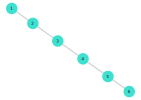

In [34]:
g = PathGraph(6)  # a simple path with 6 vertices
gplot(g, nodelabel=1:6)

In [35]:
println("Number of vertices: $(nv(g))") # function nv
println("Number of edges: $(ne(g))") # function ne

Number of vertices: 6
Number of edges: 5


We get a **loop** by linking the vertices $1$ and $6$.

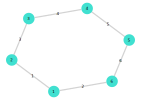

In [36]:
# We get a loop
add_edge!(g, 1, 6)  # change in place, the path graph becomes a loop
gplot(g, nodelabel=1:nv(g), edgelabel=1:ne(g))

Here is a more complicated (random) graph.

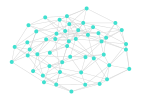

In [37]:
gplot(watts_strogatz(50, 6, 0.3))

And here is a random digraph.

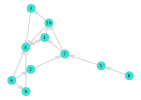

In [38]:
# A random digraph - Use Graph(n,m) for undirected graphs
gd = DiGraph(10, 15)  # DiGraph(#V, #E)
gplot(gd, nodelabel=1:nv(gd))

In [39]:
# We can list the edges
for e in edges(gd)    # vertices(G) returns the vertices
    u, v = src(e), dst(e)
    println("edge $u - $v")
end

edge 1 - 4
edge 1 - 10
edge 2 - 7
edge 3 - 4
edge 4 - 1
edge 5 - 7
edge 6 - 2
edge 6 - 4
edge 6 - 9
edge 7 - 1
edge 7 - 10
edge 8 - 5
edge 9 - 4
edge 10 - 3
edge 10 - 4


There are many types of special graphs and graph properties that have been studied extensively. There is also a lot of terminology in the field. A **complete graph** is a graph where each vertex is connected with every other vertex. A **clique** in a graph is a complete subgraph (with the obvious definition of what a subgraph is). That is, all vertices within a clique are conected with each other. An **independent set** or **stable set** is a set of vertices in a graph with no links between them. A **bipartite graph** is a graph whose vertices can be  partitioned into two independent sets.

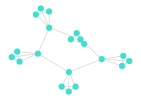

In [40]:
gplot(CliqueGraph(4,5))  # a graph with 5 "4-cliques"

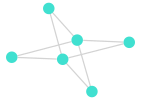

In [41]:
# Bipartite graph with all possible edges present
gplot(CompleteBipartiteGraph(2,4))  # not drawn the usual way

Some graphs are particularly famous and have names. For example, the [Petersen graph](https://en.wikipedia.org/wiki/Petersen_graph).

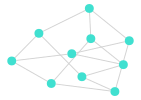

In [42]:
gplot(smallgraph(:petersen))  # Petersen graph, not drawn the usual way

*Definition:* In a graph, two vertices $u$, $v$ linked by an edge are called **neighbors**. We will denote the set of neighbors of $v$ by $N_v$.
The number of neighbors of $v$ is called the **degree** of $v$, and a graph for which all nodes have the same number of neighbors is called **regular**. For digraphs, we have the notion of **in-neighbors** of $v$, i.e., vertices $u$ for which there is an edge $(u,v)$, **out-neighbors**, and correspondingly of **in-degree** and **out-degree**.

Note that if a vertex has a self-loop, it is counted both as an in-neighbor and out-neighbor of itself.

We skip the formal definitions of intuitive notions such as **path**, **cycle**, etc. Let us introduce the convention however that a path does not reuse the same vertices, whereas a **walk** can. A graph is **connected** if there is a path between any two of its vertices. A graph that is not connected has multiple **connected components**. A graph that has no cycle is called a **forest**, and if moreover it is connected it is called a **tree**. For digraphs, we distinguish between **strongly connected** digraphs, for which there is a directed path between any two vertices, and **weakly connected** digraphs, for which the underlying undirected graph is connected. A **spanning graph** is a subgraph that contains all the vertices, and the notion of spanning tree of a (connected) graph is of particular interest.

A directed connected acyclic graph (or **DAG**) necessarily has a **root**, i.e., a vertex with no in-neighbor, and we can establish an order between the vertices, for example by numbering them starting from the root. 

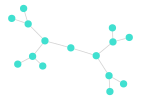

In [43]:
gplot(BinaryTree(4))  # binary tree of depth 4

### Weighted graphs

For many applications it is useful to attach additional information to the graph structure. Most commonly, we attach weights to the edges. We also typically define the weight $w_{ij}$ between two vertices $i$ and $j$ to be zero if there is no edge between them. This leads to the notion of **weighted digraphs**. Weighted (undirected) graphs are simply weighted digraphs with $w_{ij} = w_{ji}$ for any two vertices $i, j$ (see the interpretation of graphs as digraphs with bidirectional edges above). Also, unweighted digraphs can be considered as weighted digraphs with weights $w_{ij} = 1$ if $(i,j) \in E$ and $w_{ij} = 0$ otherwise.

In [44]:
#Pkg.add("SimpleWeightedGraphs")
using SimpleWeightedGraphs

In [45]:
function convert2DiGraph(gw)
    g = DiGraph(nv(gw),0)
    for e in edges(gw)
        add_edge!(g, e.src, e.dst)
    end
    return g
end

convert2DiGraph (generic function with 1 method)

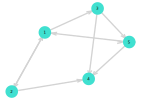

In [46]:
# Example in F. Bullo's notes, section 3.4
gw = SimpleWeightedDiGraph(5)
add_edge!(gw, 1, 2, 3.7)
add_edge!(gw, 1, 3, 3.7)
add_edge!(gw, 2, 1, 8.9)
add_edge!(gw, 2, 4, 1.2)
add_edge!(gw, 3, 4, 3.7)
add_edge!(gw, 3, 5, 2.3)
add_edge!(gw, 5, 1, 4.4)
add_edge!(gw, 5, 4, 2.3)
add_edge!(gw, 5, 5, 4.4)

gd1=convert2DiGraph(gw)
gplot(gd1,nodelabel=1:nv(gd1))

There are many classical algorithms for performing various important computations in (weighted) graphs. For example, finding the shortest path between two nodes.

In [47]:
# find the shortest path from vertex 1 to vertex 3 taking weights into account.
enumerate_paths(dijkstra_shortest_paths(gw, 1), 4)

3-element Array{Int64,1}:
 1
 2
 4

For weighted digraphs, we have weighted versions *generalizing the out-degree and in-degree definitions* for a vertex $v_i$
\begin{align}
d_{out}(v_i) = \sum_{j=1}^n w_{ij} \\
d_{in}(v_i) = \sum_{j=1}^n w_{ji}.
\end{align}
By the interpretation of weighted graph as symmetric weighted digraphs, we can define the weighted degree of a vertex in an undirected graph as $d(v) = d_{out}(v) = d_{in}(v)$. In passing, more generally, a weighted graph satisfying $d_{out}(v) = d_{in}(v)$ for all its vertices is called weighted-balanced.

In [48]:
# Let's define a union type for directed or undirected weighted graphs
WG = Union{WDiGraph, WGraph}

Union{SimpleWeightedGraphs.SimpleWeightedDiGraph, SimpleWeightedGraphs.SimpleWeightedGraph}

## Some Matrices Associated with Graphs

Graphs are associated naturally with certain matrices (adjacency matrix, indidence matrix, Laplacian matrix, etc.). A remarkable fact is that many properties of graphs are connected to certain properties of these matrices. Hence, there is a strong link between graph theory and linear algebra (or algebra more generally). For a reference on this topic, you can consult for example the book "Algebraic Graph Theory", by Godsil and Royle. The connection between graph theory and matrix algebra is heavily used to study and design decentralized and multi-agent systems.

### Adjacency Matrix

The **adjacency matrix** of a weighted digraph with $n$ vertices is simply an $n \times n$ matrix $W$ collecting the edge weights, i.e., $w_{ij}$ is the weight of edge $(i,j)$. Hence, we can also call this matrix the **weight matrix**. 
Often, but not always, the edge weights are assumed necessarily nonnegative.
This definition can then be specialized to simpler types of graphs. For example, the adjacency matrix of an unweighted digraph is a binary ($0$-$1$) matrix. *The adjacency matrix of an undirected graph is always symmetric* (and the diagonal entries are $0$ if we do not allow self-loops in undirected graphs). We can also define for weighted digraph the *binary* adjacency matrix $A$, with $A_{ij} = 1$ if $W_{ij} \neq 0$ and $A_{ij} = 0$ otherwise.

In [49]:
#adjacency_matrix(g)
Matrix(adjacency_matrix(gd))  # adjacency_matrix by itself returns a sparse matrix, convert to dense for nicer output

10×10 Array{Int64,2}:
 0  0  0  1  0  0  0  0  0  1
 0  0  0  0  0  0  1  0  0  0
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  1  0  1  0  0  0  0  1  0
 1  0  0  0  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  1  1  0  0  0  0  0  0

In [50]:
# the function adjacency_matrix returns in fact the binary adjacency matrix of a weighted graph
Matrix(adjacency_matrix(gw))

5×5 Array{Int64,2}:
 0  1  1  0  0
 1  0  0  1  0
 0  0  0  1  1
 0  0  0  0  0
 1  0  0  1  1

In [51]:
# use weights to return what is called the (weighted) adjacency matrix above
Matrix(weights(gw))  

5×5 Array{Float64,2}:
 0.0  3.7  3.7  0.0  0.0
 8.9  0.0  0.0  1.2  0.0
 0.0  0.0  0.0  3.7  2.3
 0.0  0.0  0.0  0.0  0.0
 4.4  0.0  0.0  2.3  4.4

The weighted out-degree matrix $D_{out}$ is a diagonal $n \times n$ matrix with the out-degrees of each node on the diagonal. We define the weighted in-degree matrix $D_{in}$ simlarly. We have in fact the following identities: $D_{out} = \text{diag}(W \, \mathbf 1)$ and $D_{in} = \text{diag}(W^T \, \mathbf 1)$. For weighted undirected graphs, we have $D_{out} = D_{in}$.

Exercise: Prove these statements.

In [52]:
Dout(weightMat) = Diagonal(weightMat * ones(size(weightMat)));
Din(weightMat) = Diagonal(weightMat' * ones(size(weightMat)));

In [53]:
Dout(weights(gw))

5×5 Diagonal{Float64}:
 7.4    ⋅    ⋅    ⋅     ⋅ 
  ⋅   10.1   ⋅    ⋅     ⋅ 
  ⋅     ⋅   6.0   ⋅     ⋅ 
  ⋅     ⋅    ⋅   0.0    ⋅ 
  ⋅     ⋅    ⋅    ⋅   11.1

The *powers of the adjacency matrix* characterize in particular the presence of (directed) walks between vertices in the graph. Namely, it is not hard to show that for $W$ a matrix of *nonnegative weights*, $[W^k]_{ij} \neq 0$ if and only if there exists a walk of length $k$ from $i$ to $j$ (including those with self-loops). In fact, $[A^k]_{ij}$, for $A$ the binary adjacency matrix corresponding to $W$, represents in this case the number of walks of length $k$ going from $i$ to $j$ (including paths with self-loops).

As a result, $\text{Tr}(A^r)$ is the number of closed walks in the graph. Hence, $\text{Tr}(A)=0, \text{Tr}(A^2)=2e$ and $\text{Tr}(A^3)=6t$, where $e$ and $t$ are the number of edges and triangles in the graph.

Exercise: Prove these statements.

### Incidence Matrix

The **incidence matrix** $B$ of a weighted digraph $G = (V, E)$ with $n$ vertices and $m$ edges and nonnegative weights $w_e, e \in E$, is an $n \times m$ matrix, with one row per vertex and one column per edge, and entries
\begin{align*}
B_{ie} = \begin{cases} +\sqrt{w_{e}} & \text{if } e = (i,\cdot) \\ - \sqrt{w_{e}} & \text{if } e = (\cdot, i) \\ 0 &  \text{otherwise}.
\end{cases}
\end{align*}
The choice of using a positive sign for source vertices and negative sign for sink vertices is arbitrary and the opposite convention could be adopted.
For undirected graphs, we start by orienting each edge arbitrarily and then define the incidence matrix as above. As usual, unweighted graphs are weighted graphs with weights $0$ and $1$. As for adjacency matrices, we can also define a *binary* incidence matrix corresponding to the weighted one.

Note that we have $1^T B = 0$, because each column $e = (i,j)$ contains exactly one entry $+\sqrt{w_{e}}$ on row $i$, one entry $-\sqrt{w_{e}}$ on row $j$, and zeros otherwise. Also, the element $e = (i,j)$ of the row vector $x^T B$ is equal to $\sqrt{w_{ij}} (x_i - x_j)$.

Note that for a self-loop, by the rule above the corresponding column should be zero (hence the column does not need to appear). This convention is apparently not universal.

In [54]:
# This is the binary incidence matrix
# The sign convention opposite to the one above is adopted
Matrix(incidence_matrix(gw))   # note also that it has an extra column with a 1 for the self-loop

5×9 Array{Int64,2}:
 -1  -1   1   0   0   0   1   0  0
  1   0  -1  -1   0   0   0   0  0
  0   1   0   0  -1  -1   0   0  0
  0   0   0   1   1   0   0   1  0
  0   0   0   0   0   1  -1  -1  1

Note: Sometimes an incidence matrix for an undirected graph is defined as having two $+\sqrt{w_e}$ (or $+1$) entries per column, without orienting edges first. This leads to sometimes different algebraic formulas, although the proof arguments remain the same. For simplicity, we will not use this definition here. 

In [55]:
Matrix(incidence_matrix(PathGraph(4)))  # we will not use this kind of unsigned incidence matrix

4×3 Array{Int64,2}:
 1  0  0
 1  1  0
 0  1  1
 0  0  1

In [56]:
# Here is a way to compute the weighted indicence matrix above 
sqrtWeightMat(g_w::WG) = Diagonal(sqrt.(weight.([e for e in edges(g_w)])));
# multiply each column by sqrt(w_e)
# sign correction to follow our convention
weighted_incidence_matrix(g_w::WG) = -incidence_matrix(g_w) * sqrtWeightMat(g_w);  

In [57]:
B = Matrix(weighted_incidence_matrix(gw))  # with the extra column
#B = B[:,1:end-1]  # remove the extra column

5×9 Array{Float64,2}:
  1.92354   1.92354  -2.98329   0.0      …  -2.09762   0.0       0.0    
 -1.92354   0.0       2.98329   1.09545      0.0       0.0       0.0    
  0.0      -1.92354   0.0       0.0          0.0       0.0       0.0    
  0.0       0.0       0.0      -1.09545      0.0      -1.51658   0.0    
  0.0       0.0       0.0       0.0          2.09762   1.51658  -2.09762

Here is a useful property of incidence matrices.

**Theorem:** If $G = (V,E)$ is a graph with $c$ connected components $G_d$ is a digraph obtained by any orientation of $G$, and $B$ is the incidence matrix of $G_d$, then the dimension of the null space of $B^T$ is $c$. Hence, the rank of $B$ is $|V|-c$.

**Proof:** This comes from the fact that if $x \in \text{Ker}(B^T)$, i.e., $[B^T x]_e = \sqrt{w_e} (x_{src(e)} - x_{dst(e)}) = 0$ for each edge $e$ in the graph. In other words, the values of the components of $x$ are necessarily constant on each connected component of the graph. Therefore, the space of the possible vectors $x$ has dimension $c$.

In particular, for a connected graph, the rank of $B$ is $n-1$. Also, note that the rank of $B$ can never by $n$, since we always have $1^T B = 0$, i.e., each column of $B$ sums to zero. Such a matrix is called **column stochastic**.

### Laplacian Matrix

#### Laplacian Matrix of Undirected Graphs

We start with the following result.

**Theorem:** For a weighted **undirected** graph $G = (V,E)$, if $G_d$ is any orientation of $G$, we have the identity $BB^T = D - W$, where $B$ is the incidence matrix of $G_d$ and $W$, $D$ are the weight matrix and degree matrix of $G_d$.

**Proof:** The entry $(i,j)$ of the matrix $BB^T$ represents the dot product of row $i$ and row $j$ in $B$. So, for the diagonal entries, for each edge $\{i,j\}$ in the undirected graph we have a single oriented edge $(i,j)$ or $(j,i)$ in the orientation $G_d$. In the dot product of a row by itself, each edge contributes a term $\sqrt{w_e}^2 = w_e$. For the non-diagonal entries, we look at the dot product of two different rows $i$ and $j$ of $B$. For each column of $B$, it either corresponds to the edge $\{i,j\}$ of $G$ and thus the one row will contain $-\sqrt{w_e}$ and the other $\sqrt{w_e}$ in that column, resulting in a term $-w_e$ in the dot product. Or it does not correspond to the edge $\{i,j\}$ and therefore one of the entry in the two rows will be necessary $0$, hence that column does not contribute anything to the dot product.

We define the matrix appearing in the above theorem as the Laplacian matrix of the undirected graph $L = D - W$. This matrix is and size $|V| \times |V|$ and symmetric since $D$ and $W$ are symmetric. Explicit formulas are
$$
L_{ij} = \begin{cases} 
\sum_{k \in N(i)} w_{ik}, & \text{ if } i = j \\
-w_{ij}, & \text{ if } j \in N(i) \\
0, & \text{ otherwise}.
\end{cases}
$$

Note in particular that the diagonal terms are positive, or zero if the node is disconnected, and all the off-diagonal terms are nonnegative. Also, each row sums to zero, i.e., $L 1 = 0$. A matrix verifying this property is called **row stochastic**.

Since $L = B B^T$, $L$ is a positive semidefinite matrix, and the rank of $L$ is the same as the rank of $B$. By a previous theorem, we then know that the rank of $L$ is the number of vertices minus the number of connected components in the graph.

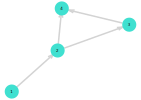

In [58]:
gtest = WGraph(4)
gtestOriented = WDiGraph(4);
add_edge!(gtest,1,2,2.4)
add_edge!(gtestOriented,1,2,2.4)
add_edge!(gtest,2,3,3.7)
add_edge!(gtestOriented,2,3,3.7)
add_edge!(gtest,3,4,1.4)
add_edge!(gtestOriented,3,4,1.4)
add_edge!(gtest,2,4,5.8)
add_edge!(gtestOriented,2,4,5.8)
gplot(convert2DiGraph(gtestOriented),nodelabel=1:nv(gtestOriented))

In [59]:
W = weights(gtest)  # W is symmetric
L = Dout(W)-W  # Dout = Din for an undirected graph
Matrix(L)      # so L is symmetric as well

4×4 Array{Float64,2}:
  2.4  -2.4   0.0   0.0
 -2.4  11.9  -3.7  -5.8
  0.0  -3.7   5.1  -1.4
  0.0  -5.8  -1.4   7.2

In [60]:
B = Matrix(weighted_incidence_matrix(gtestOriented))
Matrix(B*B')

4×4 Array{Float64,2}:
  2.4  -2.4   0.0   0.0
 -2.4  11.9  -3.7  -5.8
  0.0  -3.7   5.1  -1.4
  0.0  -5.8  -1.4   7.2

In [61]:
weighted_laplacian_matrix(g_w::WG) = Dout(weights(g_w))-weights(g_w)
rank(Matrix(weighted_laplacian_matrix(gtest)))  # 4-1 = 3 since graph is connected

3

#### Laplacian Matrix of Directed Graphs

For a weighted directed graph with weight matrix $W$ and out-degree matrix $D_{out}$, we can define its Laplacian matrix as $L = D_{out} - W$. In this case, $L$ is no longer symmetric in general, since $W$ is not necessarily symmetric.

This recovers the definition of Laplacian matrix above when the graph is undirected, since in this case $D_{out} = D_{in} = D$.

Since $L$ is now not necessarily symmetric, we cannot have $L$ equal to $B B^T$ for the incidence matrix $B$ of the directed graph. The matrix $B B^T$ is important for directed graphs as well, but we will focus on the simpler case of undirected graphs for simplicity.

In [62]:
Matrix(weighted_laplacian_matrix(gw))

5×5 Array{Float64,2}:
  7.4  -3.7  -3.7   0.0   0.0
 -8.9  10.1   0.0  -1.2   0.0
  0.0   0.0   6.0  -3.7  -2.3
  0.0   0.0   0.0   0.0   0.0
 -4.4   0.0   0.0  -2.3   6.7

## Spectral Graph Theory

The spectrum of a matrix is the set of its eigenvalues together with their multiplicity. The spectral radius of a matrix is the maximum modulus of its eigenvalues.

Spectral graph theory studies the relationship between the spectrum of the matrices defined above and the properties of the underlying graphs.

For example, since $\text{Tr}(A^r)$ is the sum of the $r^{\text{th}}$ power of the eigenvalues of $A$, the spectrum of $A$ determines the number of vertices, edges and triangles in the graph, by previous remarks about the adjacency matrix.

As another example, we have seen that the Laplacian of an undirected graph is symmetric and positive semidefinite. Hence, it has real, nonnegative eigenvalues. Moreover, its rank is $|V|-1$ is the graph is connected. Hence, *the graph is connected if and only if the second smallest eigenvalue of $L$ is strictly positive* (the smallest one being $0$).